# Golden Task: Choose a dataset with a time component and perform time series analysis

Embark on a time series analysis project using a dataset with a time component, specifically historical stock prices. The objective is to uncover patterns, trends, and insights from the temporal data, enabling a better understanding of stock price movements over time.

Import the required libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data=pd.read_csv("D:\Datasets\Power consumption in India(2019-2020)\dataset_tk.csv")
data.rename(columns={"Unnamed: 0":"Date"},inplace=True)
data['Date']=pd.to_datetime(data["Date"],dayfirst=True)
data["year"]=data["Date"].dt.year
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.day
data.drop(["Date"],axis=1,inplace=True)
data.head(2)

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,year,month,day
0,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019,1,2
1,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019,1,3


In [3]:
long=pd.read_csv("D:\Datasets\Power consumption in India(2019-2020)\long_data_.csv")
long['Dates']=pd.to_datetime(long["Dates"],dayfirst=True)
long["year"]=long["Dates"].dt.year
long["month"]=long["Dates"].dt.month
long["day"]=long["Dates"].dt.day
long.drop(["latitude","longitude","Dates"],axis=1,inplace=True)
long.head(2)

,States,Regions,Usage,year,month,day
0,Punjab,NR,119.9,2019,1,2
1,Haryana,NR,130.3,2019,1,2


# Yearly consumption of power among the Regions 

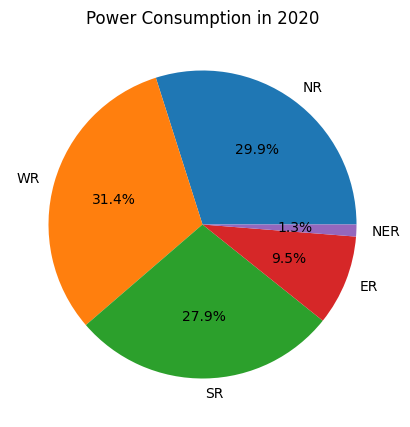

In [56]:
power_consumption_2020 = dict()
for region in long.Regions.unique():
    data_2020 = long[(long["Regions"]==region) & (long["year"]==2020)]
    total_usage_2020 = data_2020.Usage.sum()
    power_consumption_2020.update({region: total_usage_2020})

plt.figure(figsize=(10,5))
plt.pie(power_consumption_2020.values(), labels = power_consumption_2020.keys(), autopct='%1.1f%%')
plt.title('Power Consumption in 2020')
plt.show()

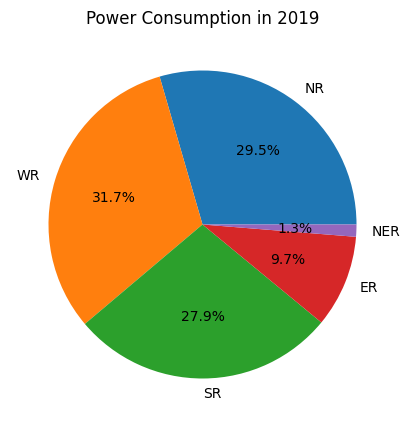

In [57]:
power_consumption_2019 = dict()
for region in long.Regions.unique():
    data_2019 = long[(long["Regions"]==region) & (long["year"]==2019)]
    total_usage_2019 = data_2019.Usage.sum()
    power_consumption_2019.update({region: total_usage_2019})

plt.figure(figsize=(10,5))
plt.pie(power_consumption_2019.values(), labels = power_consumption_2019.keys(), autopct='%1.1f%%')
plt.title('Power Consumption in 2019')
plt.show()

Both the graphs states that the WR (West Region) has the highest power consumption in both the years.

# Yearly consumption of power by the States


Text(0.5, 1.0, 'States that consume maximum power in 2020')

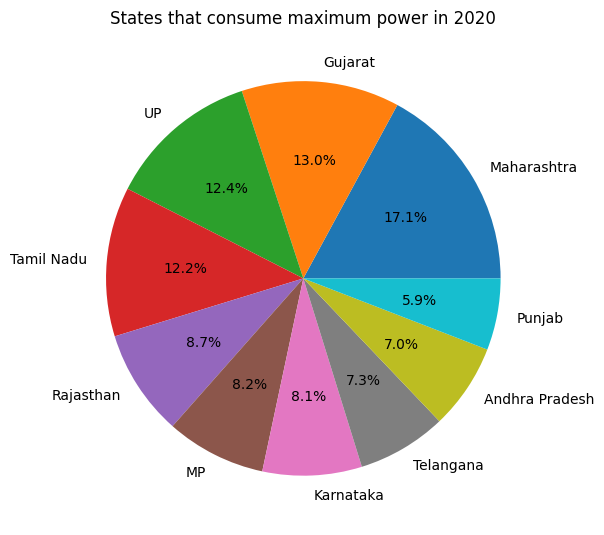

In [31]:
usage_2020 = {}
for state in long['States'].unique():
    usage_data = long[(long['States'] == state) & (long['year'] == 2020)]
    total_usage = usage_data.Usage.sum()
    usage_2020[state] = total_usage

df_2020 = pd.DataFrame.from_dict(usage_2020, orient='index')

df_2020.rename(columns={0: 'Total Usage in 2020'}, inplace=True)

df_2020.sort_values(by=['Total Usage in 2020'], ascending=False, inplace=True)

plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.pie(df_2020['Total Usage in 2020'].head(10), labels=df_2020.index[:10], autopct='%1.1f%%')
plt.title('States that consume maximum power in 2020')

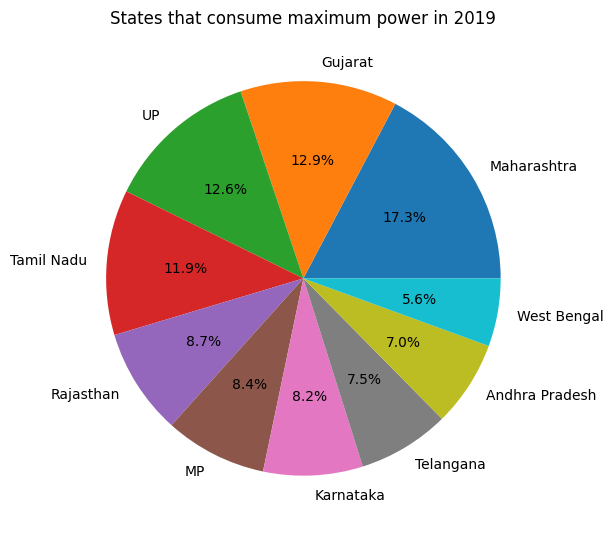

In [32]:
usage_2019 = {}
for state in long['States'].unique():
    usage_data = long[(long['States'] == state) & (long['year'] == 2019)]
    total_usage = usage_data.Usage.sum()
    usage_2019[state] = total_usage

df_2019 = pd.DataFrame.from_dict(usage_2019, orient='index')

df_2019.rename(columns={0: 'Total Usage in 2019'}, inplace=True)

df_2019.sort_values(by=['Total Usage in 2019'], ascending=False, inplace=True)

plt.figure(figsize=(14, 7))
plt.subplot(122)
plt.pie(df_2019['Total Usage in 2019'].head(10), labels=df_2019.index[:10], autopct='%1.1f%%')
plt.title('States that consume maximum power in 2019')
plt.show()

C:\Users\Vasanth Kumar C\AppData\Local\Temp\ipykernel_10968\3628268356.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_2020['Total Usage in 2020'], label='2020', shade=True)
C:\Users\Vasanth Kumar C\AppData\Local\Temp\ipykernel_10968\3628268356.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_2019['Total Usage in 2019'], label='2019', shade=True)


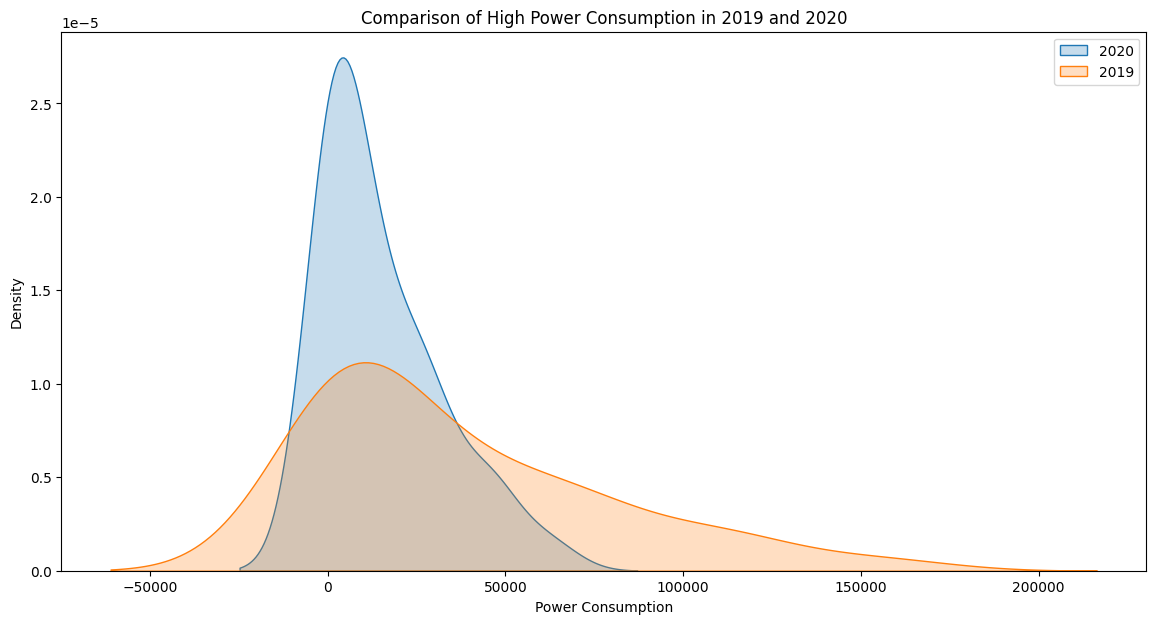

In [33]:
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df_2020['Total Usage in 2020'], label='2020', shade=True)
sns.kdeplot(data=df_2019['Total Usage in 2019'], label='2019', shade=True)
plt.title('Comparison of High Power Consumption in 2019 and 2020')
plt.xlabel('Power Consumption')
plt.ylabel('Density')
plt.legend()
plt.show()

Text(0.5, 1.0, 'States that consume less power in 2020')

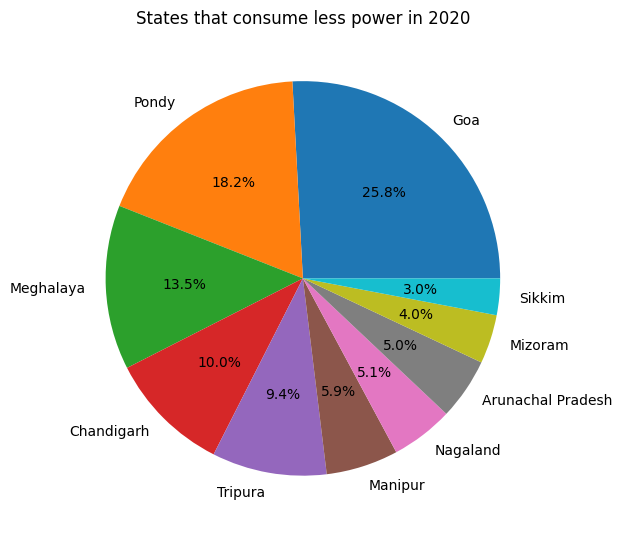

In [24]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.pie(df_2020['Total Usage in 2020'].tail(10), labels=df_2020.index[-10:], autopct='%1.1f%%')
plt.title('States that consume less power in 2020')

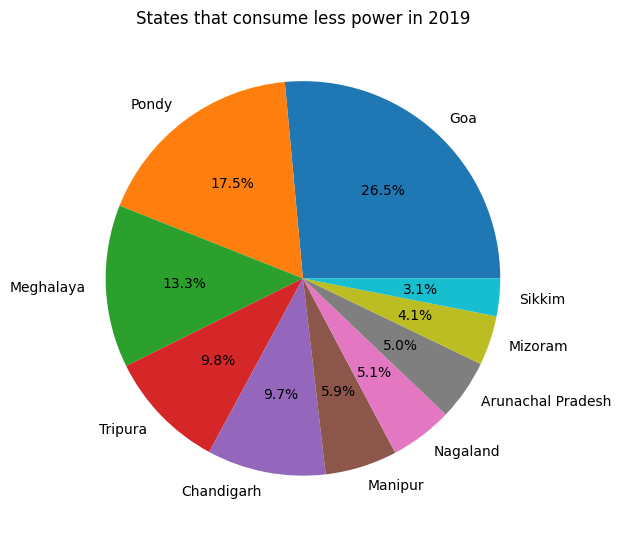

In [25]:
plt.figure(figsize=(14, 7))
plt.subplot(122)
plt.pie(df_2019['Total Usage in 2019'].tail(10), labels=df_2019.index[-10:], autopct='%1.1f%%')
plt.title('States that consume less power in 2019')
plt.show()

C:\Users\Vasanth Kumar C\AppData\Local\Temp\ipykernel_10968\766385998.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_2020['Total Usage in 2020'], label='2020', shade=True)
C:\Users\Vasanth Kumar C\AppData\Local\Temp\ipykernel_10968\766385998.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_2019['Total Usage in 2019'], label='2019', shade=True)


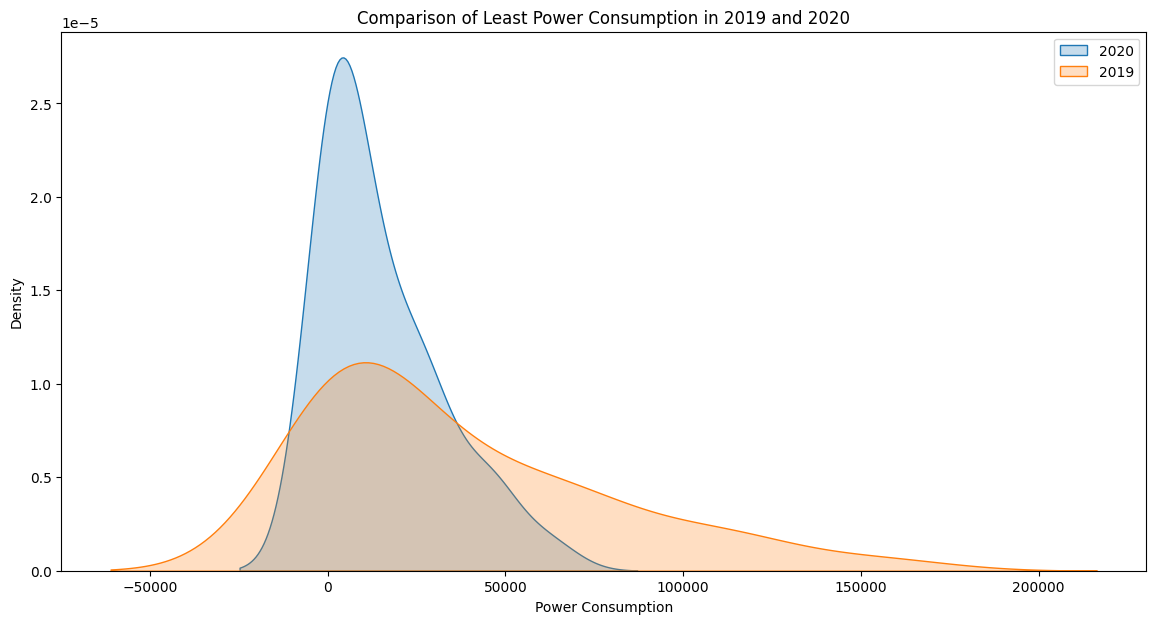

In [27]:
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df_2020['Total Usage in 2020'], label='2020', shade=True)
sns.kdeplot(data=df_2019['Total Usage in 2019'], label='2019', shade=True)
plt.title('Comparison of Least Power Consumption in 2019 and 2020')
plt.xlabel('Power Consumption')
plt.ylabel('Density')
plt.legend()
plt.show()

Both the graphs states that the Highest power is consumed by the state Maharashtra and the Lowest power is consumed by the state Sikkim

# Power consumption among the Months

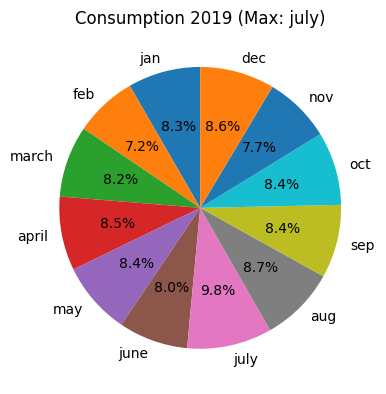

In [48]:
consumption_2019=dict()
for month in range(1,13):
    monthly_data=long[(long["month"]==month)&(long["year"]==2019)]
    total_usage=monthly_data["Usage"].sum()
    consumption_2019.update({month:total_usage})
    
month_names=["jan","feb",'march',"april","may","june","july","aug","sep","oct","nov","dec"]
usage_2019=list(consumption_2019.values())

max_usage_2019 = max(usage_2019)
max_month_2019 = month_names[usage_2019.index(max_usage_2019)]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(usage_2019, labels = month_names, startangle=90, autopct='%1.1f%%')
plt.title(f'Consumption 2019 (Max: {max_month_2019})')
plt.show()

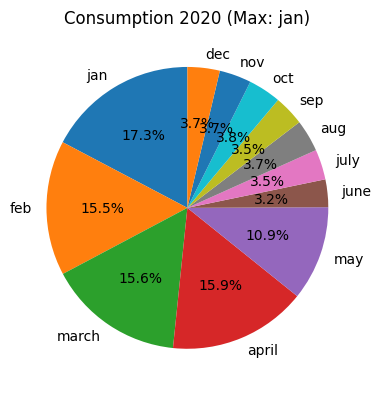

In [50]:
consumption_2020=dict()
for month in range(1,13):
    monthly_data=long[(long["month"]==month)&(long["year"]==2020)]
    total_usage=monthly_data["Usage"].sum()
    consumption_2020.update({month:total_usage})

usage_2020=list(consumption_2020.values())

max_usage_2020 = max(usage_2020)
max_month_2020 = month_names[usage_2020.index(max_usage_2020)]

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.pie(usage_2020, labels = month_names, startangle=90, autopct='%1.1f%%')
plt.title(f'Consumption 2020 (Max: {max_month_2020})')
plt.show()

C:\Users\Vasanth Kumar C\AppData\Local\Temp\ipykernel_10968\1085967823.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(usage_2019, label='2019', shade=True)
C:\Users\Vasanth Kumar C\AppData\Local\Temp\ipykernel_10968\1085967823.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(usage_2020, label='2020', shade=True)


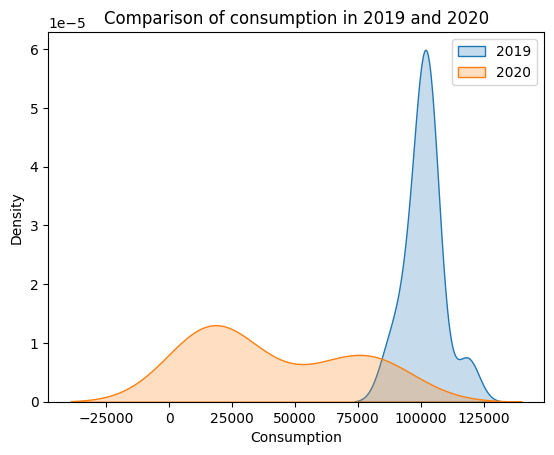

In [37]:
sns.kdeplot(usage_2019, label='2019', shade=True)
sns.kdeplot(usage_2020, label='2020', shade=True)
plt.title('Comparison of consumption in 2019 and 2020')
plt.xlabel('Consumption')
plt.ylabel('Density')
plt.legend()
plt.show()

Both the graphs states that the Maximum power is consumed during July in 2019 and January in 2020

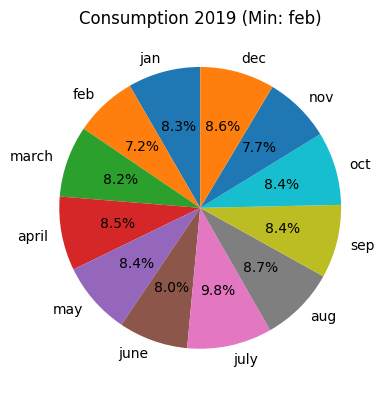

In [39]:
min_usage_2019 = min(usage_2019)
min_month_2019 = month_names[usage_2019.index(min_usage_2019)]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(usage_2019, labels = month_names, startangle=90, autopct='%1.1f%%')
plt.title(f'Consumption 2019 (Min: {min_month_2019})')
plt.show()

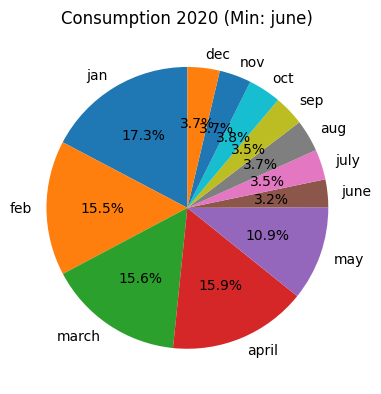

In [41]:
min_usage_2020 = min(usage_2020)
min_month_2020 = month_names[usage_2020.index(min_usage_2020)]

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.pie(usage_2020, labels = month_names, startangle=90, autopct='%1.1f%%')
plt.title(f'Consumption 2020 (Min: {min_month_2020})')
plt.show()

C:\Users\Vasanth Kumar C\AppData\Local\Temp\ipykernel_10968\1085967823.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(usage_2019, label='2019', shade=True)
C:\Users\Vasanth Kumar C\AppData\Local\Temp\ipykernel_10968\1085967823.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(usage_2020, label='2020', shade=True)


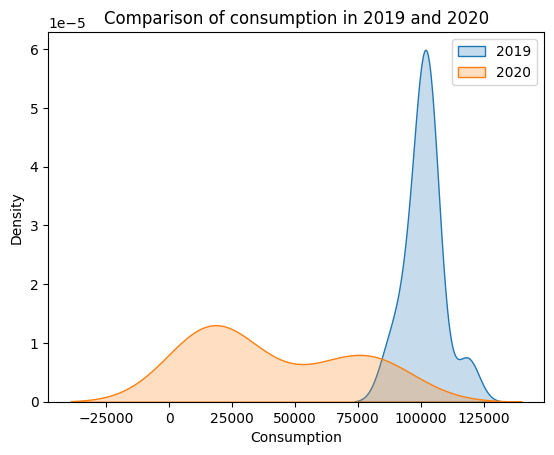

In [42]:
sns.kdeplot(usage_2019, label='2019', shade=True)
sns.kdeplot(usage_2020, label='2020', shade=True)
plt.title('Comparison of consumption in 2019 and 2020')
plt.xlabel('Consumption')
plt.ylabel('Density')
plt.legend()
plt.show()

Both the graphs states that the Maximum power is consumed during Feburary in 2019 and June in 2020

# Power consumption during the Pre and Post Lockdown periods

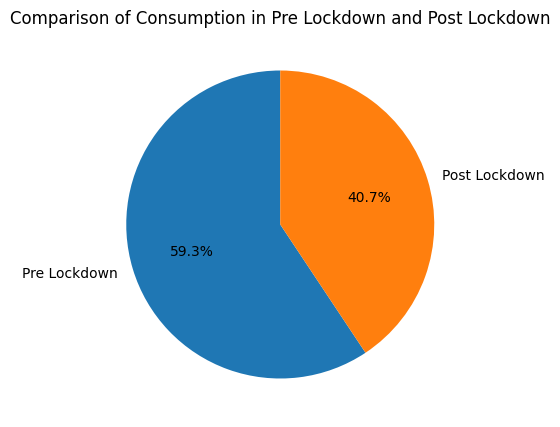

In [55]:
total_consumption_2019 = sum(usage_2019[2:5])
total_consumption_2020 = sum(usage_2020[2:5])

labels = ['Pre Lockdown', 'Post Lockdown']
sizes = [total_consumption_2019, total_consumption_2020]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels = labels, startangle=90, autopct='%1.1f%%')
plt.title('Comparison of Consumption in Pre Lockdown and Post Lockdown')
plt.show()

The graph states that a large amount of power was consumed during the pre lockdown period and it was reduced in the post lockdown period.